<a href="https://colab.research.google.com/github/sanganisiddhartha/sanganisiddhartha/blob/main/UKCompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

Uploading the file

In [ ]:
zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/data'

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
os.listdir(extract_path)


['corporate_uk']

In [ ]:
import pandas as pd


In [ ]:
import os

# Check extracted files
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['corporate_uk']


In [ ]:
import os

# List all files in the Colab session
for root, dirs, files in os.walk("/content"):
    for file in files:
        print(os.path.join(root, file))


/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/logs/2025.04.17/13.35.45.156135.log
/content/.config/logs/2025.04.17/13.36.24.374055.log
/content/.config/logs/2025.04.17/13.36.05.735198.log
/content/.config/logs/2025.04.17/13.36.23.688038.log
/content/.config/logs/2025.04.17/13.36.15.306468.log
/content/.config/logs/2025.04.17/13.36.14.140968.log
/content/.config/configurations/config_default
/content/drive/MyDrive/Getting started.pdf
/content/drive/MyDrive/DS Sem 2 imp.pdf
/content/drive/MyDrive/certificate.pdf
/content/drive/MyDrive/ntTvo6ru6Tq3A2JPq_BCG_A4iMTRe4hN9yZzyyi_completion_certificate.pdf
/content/drive/MyDrive/Sangani_Siddhartha_Hired_Certificate.pdf
/content/drive/MyDrive/TSF GRIP C

In [ ]:
file_path = "/content/data/corporate_uk/companies_sic_codes.csv"

with open(file_path, 'r', encoding='utf-8') as f:
    for _ in range(10):  # Print first 10 lines
        print(f.readline().strip())


company_number;sic_code;sic_description;sic_section;sic_division;company_url
01729565;95110;Repair of computers and peripheral equipment;Other service activities;Repair of computers and personal and household goods;https://corpsignals.com/companies/uk/professional-software-design-ltd-01729565.html
01729565;62020;Information technology consultancy activities;Information and communication;Computer programming, consultancy and related activities;https://corpsignals.com/companies/uk/professional-software-design-ltd-01729565.html
01729572;74202;Other specialist photography;Professional, scientific and technical activities;Other professional, scientific and technical activities;https://corpsignals.com/companies/uk/apollo-photographers-ltd-01729572.html
01729582;98000;Residents property management;"Activities of households as employers; undifferentiated goods-and services-producing activities of households for own use";Undifferentiated goods- and services-producing activities of private house

In [ ]:
import os

# List all files in /content
os.listdir('/content')


['.config', 'drive', 'data', 'sample_data']

In [ ]:
os.listdir('/content/data/corporate_uk')


['filings.csv',
 'officers_and_owners.csv',
 'companies.csv',
 'companies_sic_codes.csv']

In [ ]:
import dask.dataframe as dd

# Define file paths and column dtypes
base_path = "/content/data/corporate_uk/"
files = {
    "companies": "companies.csv",
    "sic_codes": "companies_sic_codes.csv",
    "filings": "filings.csv",
    "officers_owners": "officers_and_owners.csv"
}

# Specify the column data types for certain columns to avoid dtype issues
dtype = {
    'company_country': 'object',
    'company_number': 'object'
}

# Load CSV files with the correct separator ";" and dtypes
df_companies = dd.read_csv(base_path + files["companies"], sep=";", encoding="utf-8", assume_missing=True, dtype=dtype)
df_sic_codes = dd.read_csv(base_path + files["sic_codes"], sep=";", encoding="utf-8", assume_missing=True, dtype=dtype) # Apply dtype to df_sic_codes as well
df_filings = dd.read_csv(base_path + files["filings"], sep=";", encoding="utf-8", assume_missing=True, dtype=dtype) # Apply dtype to df_filings as well
df_officers_owners = dd.read_csv(base_path + files["officers_owners"], sep=";", encoding="utf-8", assume_missing=True, dtype=dtype) # Apply dtype to df_officers_owners as well

In [ ]:
# Display first few rows of each DataFrame
df_companies.head(), df_sic_codes.head(), df_filings.head(), df_officers_owners.head()


(  company_number             company_type  \
 0       13511884  Private limited company   
 1       13511885  Private limited company   
 2       13511887  Private limited company   
 3       13511889  Private limited company   
 4       13511892  Private limited company   
 
                                       office_address incorporation_date  \
 0  CM20 1YS, England, Harlow, Essex, C/O Aacsl Ac...         2021-07-15   
 1  RH2 7JN, England, Reigate, Surrey, Chart House...         2021-07-15   
 2    RM8 1PS, England, Dagenham, 31 Lamberhurst Road         2021-07-15   
 3      DA12 2RX, England, Gravesend, 11 Norfolk Road         2021-07-15   
 4  UB10 0NX, England, Hillingdon, 1 Agincourt Vil...         2021-07-15   
 
     jurisdiction company_status          account_type  \
 0  England/Wales      Dissolved          Micro Entity   
 1  England/Wales         Active          Micro Entity   
 2  England/Wales         Active          Micro Entity   
 3  England/Wales         Active

In [ ]:
# Check column names and data types for each DataFrame
df_companies.compute().info()
df_sic_codes.compute().info()
df_filings.compute().info()
df_officers_owners.compute().info()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 5428900 entries, 0 to 253929
Data columns (total 18 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   company_number                          string 
 1   company_type                            string 
 2   office_address                          string 
 3   incorporation_date                      string 
 4   jurisdiction                            string 
 5   company_status                          string 
 6   account_type                            string 
 7   company_name                            string 
 8   sic_codes                               string 
 9   date_of_cessation                       string 
 10  next_accounts_overdue                   string 
 11  confirmation_statement_overdue          string 
 12  owners                                  float64
 13  officers                                float64
 14  average_number_employees_during_period  

In [ ]:
import dask.dataframe as dd

# ... (your existing code for loading DataFrames) ...


# Check for duplicate rows using `drop_duplicates` and comparing lengths
def check_duplicates(df):
    """Checks for duplicates in a Dask DataFrame by comparing lengths before and after drop_duplicates."""
    original_len = len(df)  # Get the original length
    unique_len = len(df.drop_duplicates())  # Get the length after dropping duplicates
    duplicates_count = original_len - unique_len  # Calculate the number of duplicates
    return duplicates_count

# Calculate and print the duplicate counts for each DataFrame
companies_duplicates = check_duplicates(df_companies)
sic_codes_duplicates = check_duplicates(df_sic_codes)
filings_duplicates = check_duplicates(df_filings)
officers_owners_duplicates = check_duplicates(df_officers_owners)

print(f"Duplicate rows in df_companies: {companies_duplicates}")
print(f"Duplicate rows in df_sic_codes: {sic_codes_duplicates}")
print(f"Duplicate rows in df_filings: {filings_duplicates}")
print(f"Duplicate rows in df_officers_owners: {officers_owners_duplicates}")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Duplicate rows in df_companies: 0
Duplicate rows in df_sic_codes: 0
Duplicate rows in df_filings: 35085
Duplicate rows in df_officers_owners: 7312


In [ ]:
# Drop duplicate rows
df_companies = df_companies.drop_duplicates()
df_sic_codes = df_sic_codes.drop_duplicates()
df_filings = df_filings.drop_duplicates()
df_officers_owners = df_officers_owners.drop_duplicates()


In [ ]:
# Check for missing values again
df_companies.isnull().sum().compute(), df_sic_codes.isnull().sum().compute(), df_filings.isnull().sum().compute(), df_officers_owners.isnull().sum().compute()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


(company_number                                  0
 company_type                                    0
 office_address                               1140
 incorporation_date                              0
 jurisdiction                                 1382
 company_status                                  0
 account_type                               365376
 company_name                                    1
 sic_codes                                  170628
 date_of_cessation                         4873614
 next_accounts_overdue                     4537891
 confirmation_statement_overdue            4441448
 owners                                     373081
 officers                                   143828
 average_number_employees_during_period    2072106
 current_assets                            2533928
 last_accounts_period_end                  1462068
 company_url                                     0
 dtype: int64,
 company_number     0
 sic_code           0
 sic_description    0
 

In [ ]:
# Drop rows with any missing values
df_companies = df_companies.dropna()
df_sic_codes = df_sic_codes.dropna()
df_filings = df_filings.dropna()
df_officers_owners = df_officers_owners.dropna()

In [ ]:
# Check for missing values again
df_companies.isnull().sum().compute(), df_sic_codes.isnull().sum().compute(), df_filings.isnull().sum().compute(), df_officers_owners.isnull().sum().compute()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


(company_number                            0
 company_type                              0
 office_address                            0
 incorporation_date                        0
 jurisdiction                              0
 company_status                            0
 account_type                              0
 company_name                              0
 sic_codes                                 0
 date_of_cessation                         0
 next_accounts_overdue                     0
 confirmation_statement_overdue            0
 owners                                    0
 officers                                  0
 average_number_employees_during_period    0
 current_assets                            0
 last_accounts_period_end                  0
 company_url                               0
 dtype: int64,
 company_number     0
 sic_code           0
 sic_description    0
 sic_section        0
 sic_division       0
 company_url        0
 dtype: int64,
 company_number    0
 date  

In [ ]:
# Check the actual column names in the DataFrame
print(df_companies.columns)

# Assuming the correct column name is 'incorporation_date', modify the code as follows:
df_companies['incorporation_date'] = dd.to_datetime(df_companies['incorporation_date'], errors='coerce')

Index(['company_number', 'company_type', 'office_address',
       'incorporation_date', 'jurisdiction', 'company_status', 'account_type',
       'company_name', 'sic_codes', 'date_of_cessation',
       'next_accounts_overdue', 'confirmation_statement_overdue', 'owners',
       'officers', 'average_number_employees_during_period', 'current_assets',
       'last_accounts_period_end', 'company_url'],
      dtype='object')


In [ ]:
# Convert the 'incorporation_date' to datetime, coercing errors into NaT (Not a Time) for invalid values
import dask.dataframe as dd # Import the dask.dataframe module and assign it to the alias 'dd'
df_companies['incorporation_date'] = dd.to_datetime(df_companies['incorporation_date'], errors='coerce')

# Check the updated data
# Compute the entire result before calling head()
result = df_companies[['company_number', 'company_name', 'incorporation_date']].compute()
result.head() # Call head on the Pandas DataFrame 'result'

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


KeyboardInterrupt: 

In [ ]:
# Convert 'date_of_cessation' to datetime with error handling
df_companies['date_of_cessation'] = dd.to_datetime(df_companies['date_of_cessation'], errors='coerce')

# Extract year from incorporation_date and date_of_cessation
df_companies['incorporation_year'] = df_companies['incorporation_date'].dt.year
df_companies['closure_year'] = df_companies['date_of_cessation'].dt.year

# Display first few rows to verify
df_companies[['company_number', 'incorporation_year', 'closure_year']].head()

In [ ]:
import matplotlib.pyplot as plt

# Group by incorporation year and count companies
formations_per_year = df_companies.groupby('incorporation_year').size().compute()

# Group by closure year and count closed companies
closures_per_year = df_companies.groupby('closure_year').size().compute()

# Convert to DataFrame for easier plotting
df_formations = formations_per_year.reset_index(name='num_companies_formed')
df_closures = closures_per_year.reset_index(name='num_companies_closed')

# Display first few rows to verify
df_formations.head(), df_closures.head()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


(   incorporation_year  num_companies_formed
 0                1995                     4
 1                2000                    13
 2                2002                    11
 3                2008                    19
 4                2012                    88,
    closure_year  num_companies_closed
 0          2015                    84
 1          2016                   167
 2          2019                   268
 3          2022                   221
 4          2014                    52)

In [ ]:
plt.figure(figsize=(12, 6))

# Plot formations
plt.plot(df_formations['incorporation_year'], df_formations['num_companies_formed'], label='Companies Formed', marker='o')

# Plot closures
plt.plot(df_closures['closure_year'], df_closures['num_companies_closed'], label='Companies Closed', marker='s')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Company Formations and Closures Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
# Count occurrences of each SIC code
# Check the actual column names in df_sic_codes
print(df_sic_codes.columns)

# Access the column by its actual name, it might be 'SICCode', 'sic_code', or similar
# Replace 'sic_code' with the correct column name from the output above
industry_counts = df_sic_codes['sic_code'].value_counts().compute()

# Convert to DataFrame for easier plotting
df_industry_counts = industry_counts.reset_index()
df_industry_counts.columns = ['SIC Code', 'Number of Companies']

# Display top 10 industries
df_industry_counts.head(10)

Index(['company_number', 'sic_code', 'sic_description', 'sic_section',
       'sic_division', 'company_url'],
      dtype='object')


,SIC Code,Number of Companies
0,1140.0,188
1,3210.0,692
2,10620.0,56
3,10821.0,1091
4,11070.0,1939
5,13200.0,826
6,13990.0,2298
7,15200.0,925
8,17220.0,626
9,24440.0,82


In [ ]:
# Check for missing values in the 'office_address' column
missing_values = df_companies['office_address'].isnull().sum().compute()
print(f"Missing values in 'office_address' column: {missing_values}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Missing values in 'office_address' column: 0


In [ ]:
# Check unique values in the 'office_address' column
unique_regions = df_companies['office_address'].unique().compute()
print(unique_regions[:10])  # Show first 10 unique regions


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


0    KT13 9PY, England, Weybridge, Surrey, 4 Pantil...
1    BL6 4SD, Bolton, Cowgill Holloway Business Rec...
2    L3 6BN, United Kingdom, Liverpool, 85-87 Vauxh...
3      CR0 2UF, Croydon, Surrey, 55 Kidderminster Road
4    UB5 5JS, United Kingdom, Northolt, Middlesex, ...
5    B73 5PR, England, Coldfield, West Midlands, 7 ...
6       BR6 0QF, England, Orpington, 50 Lodge Crescent
7    RM9 6RT, United Kingdom, Dagenham, 2 Chequers ...
8        TW1 1JP, Twickenham, Richmond, 45 Sidney Road
9    RM1 1TE, England, Romford, Essex, 2nd Floor 13...
Name: office_address, dtype: string


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


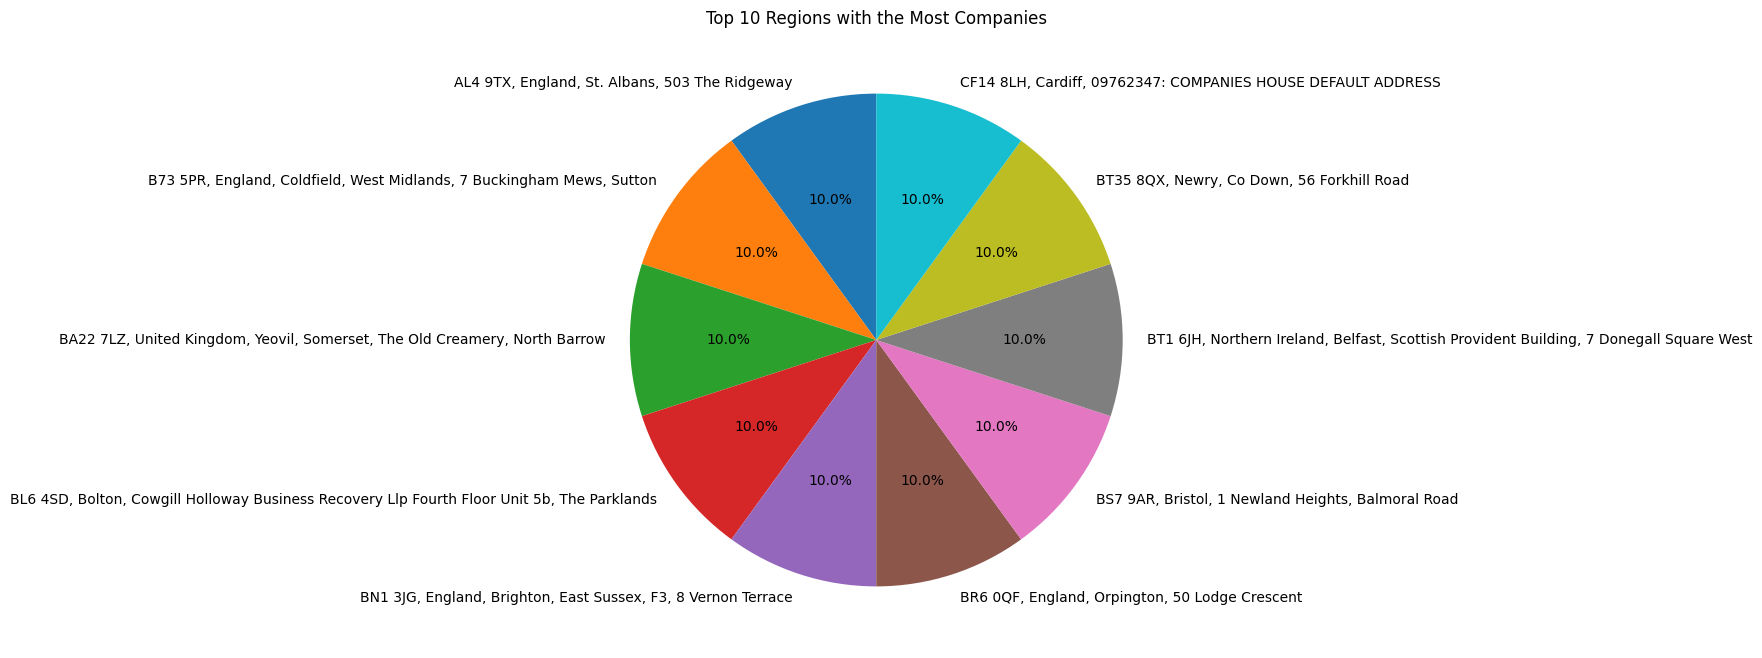

In [ ]:
import matplotlib.pyplot as plt
import dask.dataframe as dd

# Assuming 'office_address' contains region information
# Extract region information and count occurrences
region_counts = df_companies['office_address'].value_counts().compute()

# Convert to DataFrame for easier plotting
df_region_counts = region_counts.reset_index()
df_region_counts.columns = ['Region', 'Number of Companies']

# Select the top 10 regions
top_10_regions = df_region_counts.head(10)

# Plot regions as a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(top_10_regions['Number of Companies'], labels=top_10_regions['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Regions with the Most Companies')
plt.show()

In [ ]:
# Check column names in df_companies
print(df_companies.columns)

# Replace 'region_column' with the actual column name related to the company’s location
region_counts = df_companies['office_address'].value_counts().compute()

# Convert to DataFrame
df_region_counts = region_counts.reset_index()
df_region_counts.columns = ['Region', 'Number of Companies']

# Display top 10 regions
df_region_counts.head(10)


Index(['company_number', 'company_type', 'office_address',
       'incorporation_date', 'jurisdiction', 'company_status', 'account_type',
       'company_name', 'sic_codes', 'date_of_cessation',
       'next_accounts_overdue', 'confirmation_statement_overdue', 'owners',
       'officers', 'average_number_employees_during_period', 'current_assets',
       'last_accounts_period_end', 'company_url', 'incorporation_year',
       'closure_year'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,Region,Number of Companies
0,"AL4 9TX, England, St. Albans, 503 The Ridgeway",1
1,"B73 5PR, England, Coldfield, West Midlands, 7 ...",1
2,"BA22 7LZ, United Kingdom, Yeovil, Somerset, Th...",1
3,"BL6 4SD, Bolton, Cowgill Holloway Business Rec...",1
4,"BN1 3JG, England, Brighton, East Sussex, F3, 8...",1
5,"BR6 0QF, England, Orpington, 50 Lodge Crescent",1
6,"BS7 9AR, Bristol, 1 Newland Heights, Balmoral ...",1
7,"BT1 6JH, Northern Ireland, Belfast, Scottish P...",1
8,"BT35 8QX, Newry, Co Down, 56 Forkhill Road",1
9,"CF14 8LH, Cardiff, 09762347: COMPANIES HOUSE D...",1


In [ ]:
# Group by 'incorporation_year' to get the number of formations per year
formation_counts = df_companies['incorporation_year'].value_counts().compute()

# Group by 'closure_year' to get the number of closures per year
closure_counts = df_companies['closure_year'].value_counts().compute()

# Convert to DataFrame for easier plotting
df_formation_counts = formation_counts.reset_index()
df_formation_counts.columns = ['Year', 'Number of Formations']

df_closure_counts = closure_counts.reset_index()
df_closure_counts.columns = ['Year', 'Number of Closures']

# Display top 5 rows of both
print(df_formation_counts.head(), df_closure_counts.head())


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


   Year  Number of Formations
0  1930                     1
1  1934                     1
2  1962                     1
3  2010                    47
4  1973                     1    Year  Number of Closures
0  2019                 268
1  2021                 215
2  2012                   3
3  2023                 202
4  2017                 163


In [ ]:
# Filter companies that have valid formation year
df_formations = df_companies[df_companies['incorporation_year'].notnull()]

# Extract region information from office_address and aggregate by year and region
# Apply map_partitions to perform str.extract on each partition of the Dask DataFrame
df_formations['region'] = df_formations['office_address'].map_partitions(lambda df: df.str.extract(r'([A-Za-z\s]+)', expand=False), meta=('region', 'object'))  # Adjust the regex as needed
df_formations_grouped = df_formations.groupby(['incorporation_year', 'region']).size().reset_index()
# Rename the '0' column to 'Number of Companies' after reset_index
df_formations_grouped = df_formations_grouped.rename(columns={0: 'Number of Companies'})

# Display the formation counts by year and region
df_formations_grouped.head()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,incorporation_year,region,Number of Companies
0,1987,TN,1
1,2002,NW,2
2,2005,SO,1
3,2008,SK,1
4,2009,B,2


In [ ]:
# Filter companies that have valid closure year (date_of_cessation)
df_closures = df_companies[df_companies['closure_year'].notnull()]

# Extract region information from office_address for closures
# Use map_partitions to apply str.extract on each partition
df_closures['region'] = df_closures['office_address'].map_partitions(lambda df: df.str.extract(r'([A-Za-z\s]+)', expand=False), meta=('region', 'object'))  # Adjust the regex as needed

df_closures_grouped = df_closures.groupby(['closure_year', 'region']).size().reset_index()
# Rename the '0' column to 'Number of Companies' after reset_index
df_closures_grouped = df_closures_grouped.rename(columns={0: 'Number of Companies'})

# Display the closure counts by year and region
df_closures_grouped.head()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,closure_year,region,Number of Companies
0,2015,KA,1
1,2015,PO,3
2,2016,CR,4
3,2016,HA,7
4,2016,SW,5


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


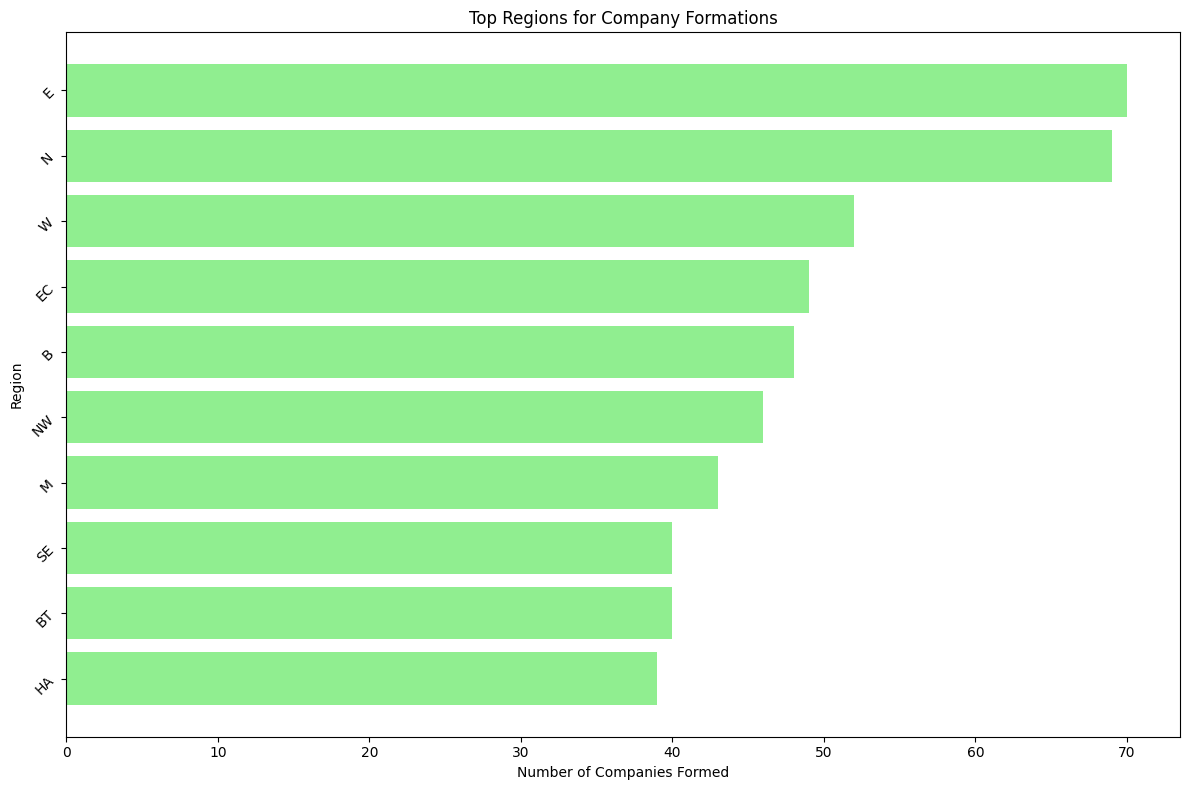

In [ ]:
# Plot company formations by year and region
plt.figure(figsize=(12, 6))
# Compute the sum and then sort
top_regions_formations = df_formations_grouped.groupby('region')['Number of Companies'].sum().compute().sort_values(ascending=False).head(10)

plt.barh(top_regions_formations.index, top_regions_formations.values, color='lightgreen')
plt.xlabel('Number of Companies Formed')
plt.ylabel('Region')
plt.title('Top Regions for Company Formations')
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.show()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


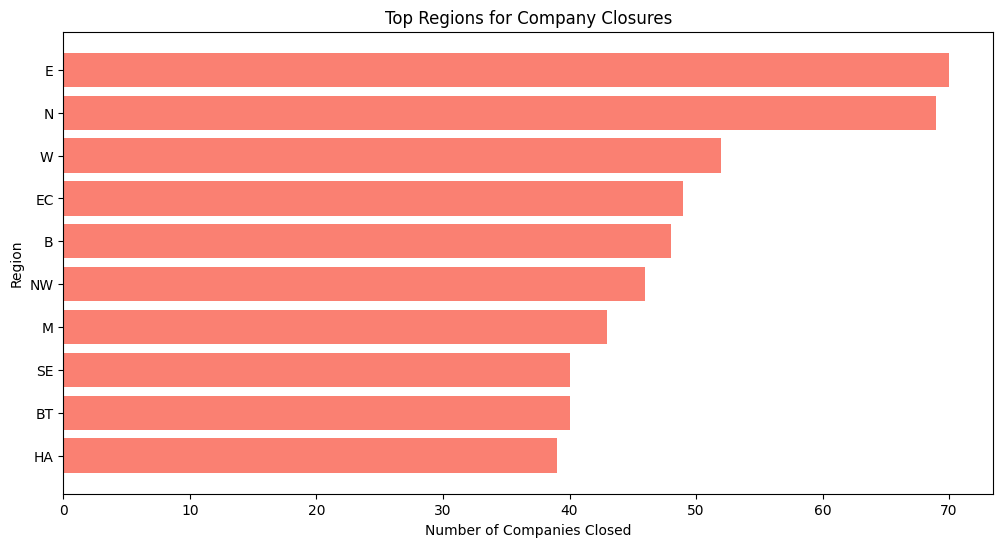

In [ ]:
# Plot company closures by year and region
plt.figure(figsize=(12, 6))

# Compute the sum and convert it to a Pandas Series before sorting
top_regions_closures = df_closures_grouped.groupby('region')['Number of Companies'].sum().compute()
# Now you have a Pandas Series, so you can use sort_values
top_regions_closures = top_regions_closures.sort_values(ascending=False).head(10)

plt.barh(top_regions_closures.index, top_regions_closures.values, color='salmon')
plt.xlabel('Number of Companies Closed')
plt.ylabel('Region')
plt.title('Top Regions for Company Closures')
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.show()

In [ ]:
# Merge companies data with SIC codes to get industries
df_formations_industry = df_formations.merge(df_sic_codes, on='company_number', how='left')

# Count the most common industries for newly formed companies
top_industries_formations = df_formations_industry['sic_code'].value_counts().compute().head(10)

# Convert to DataFrame
df_top_industries_formations = top_industries_formations.reset_index()
df_top_industries_formations.columns = ['SIC Code', 'Number of Companies Formed']

# Display top 10 industries for formations
df_top_industries_formations


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,SIC Code,Number of Companies Formed
0,13990.0,2
1,42130.0,1
2,43999.0,31
3,46380.0,2
4,47730.0,1
5,56103.0,37
6,59112.0,5
7,74909.0,33
8,77291.0,1
9,88910.0,1


In [ ]:
# Merge companies with SIC codes
df_formed = df_companies.merge(df_sic_codes, on='company_number', how='left')

# Compute Dask DataFrame to get a Pandas DataFrame
df_formed = df_formed.compute()

# Filter only formed companies (you can also filter by year if needed)
df_formed = df_formed[~df_formed['incorporation_year'].isna()]

# Count companies formed per industry
industry_formed = df_formed.groupby('sic_code')['company_number'].count().reset_index()
industry_formed.columns = ['SIC Code', 'Companies Formed']

# Sort top 10 industries
top_formed_industries = industry_formed.sort_values(by='Companies Formed', ascending=False).head(10)

# Show results
top_formed_industries


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,SIC Code,Companies Formed
267,82990.0,109
217,70229.0,88
184,62020.0,75
208,68209.0,70
315,96090.0,64
206,68100.0,52
54,41100.0,48
56,41202.0,45
160,56103.0,37
186,62090.0,35


In [ ]:
# Filter closed companies from merged dataset
# Assuming 'date_of_cessation' indicates closure
df_closed = df_formed[~df_formed['date_of_cessation'].isna()]

# Count companies closed per industry
industry_closed = df_closed.groupby('sic_code')['company_number'].count().reset_index()
industry_closed.columns = ['SIC Code', 'Companies Closed']

# Sort top 10 industries
top_closed_industries = industry_closed.sort_values(by='Companies Closed', ascending=False).head(10)

# Show results
top_closed_industries

,SIC Code,Companies Closed
267,82990.0,109
217,70229.0,88
184,62020.0,75
208,68209.0,70
315,96090.0,64
206,68100.0,52
54,41100.0,48
56,41202.0,45
160,56103.0,37
186,62090.0,35


In [ ]:
# Merge companies with SIC codes
df_formed = df_companies.merge(df_sic_codes, on='company_number', how='left')

# Compute Dask DataFrame to get a Pandas DataFrame
df_formed = df_formed.compute()

# Filter only formed companies (you can also filter by year if needed)
df_formed = df_formed[~df_formed['incorporation_year'].isna()]

# Count companies formed per industry
industry_formed = df_formed.groupby('sic_code')['company_number'].count().reset_index()
industry_formed.columns = ['SIC Code', 'Companies Formed']

# Sort top 10 industries
top_formed_industries = industry_formed.sort_values(by='Companies Formed', ascending=False).head(10)

# Show results
print("Top Formed Industries:")
print(top_formed_industries)

# --- Changes for closed companies ---

# Filter closed companies from merged dataset
# Instead of checking date_of_cessation, check if company_status is 'dissolved'
df_closed = df_formed[df_formed['company_status'] == 'dissolved']

# Check if 'company_status' column is available, otherwise use 'date_of_cessation'
if 'company_status' not in df_formed.columns:
    df_closed = df_formed[~df_formed['date_of_cessation'].isna()]

# Count companies closed per industry
industry_closed = df_closed.groupby('sic_code')['company_number'].count().reset_index()
industry_closed.columns = ['SIC Code', 'Companies Closed']

# Sort top 10 industries
top_closed_industries = industry_closed.sort_values(by='Companies Closed', ascending=False).head(10)

# Show results
print("\nTop Closed Industries:")
print(top_closed_industries)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Top Formed Industries:
     SIC Code  Companies Formed
267   82990.0               109
217   70229.0                88
184   62020.0                75
208   68209.0                70
315   96090.0                64
206   68100.0                52
54    41100.0                48
56    41202.0                45
160   56103.0                37
186   62090.0                35

Top Closed Industries:
Empty DataFrame
Columns: [SIC Code, Companies Closed]
Index: []


In [ ]:
# Merge closed companies with SIC codes
df_closures_industry = df_closures.merge(df_sic_codes, on='company_number', how='left')

# Count the most common industries for closed companies
top_industries_closures = df_closures_industry['sic_code'].value_counts().compute().head(10)

# Convert to DataFrame
df_top_industries_closures = top_industries_closures.reset_index()
df_top_industries_closures.columns = ['SIC Code', 'Number of Companies Closed']

# Display top 10 industries for closures
df_top_industries_closures


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,SIC Code,Number of Companies Closed
0,13990.0,2
1,42130.0,1
2,43999.0,31
3,46380.0,2
4,47730.0,1
5,56103.0,37
6,59112.0,5
7,74909.0,33
8,77291.0,1
9,88910.0,1


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


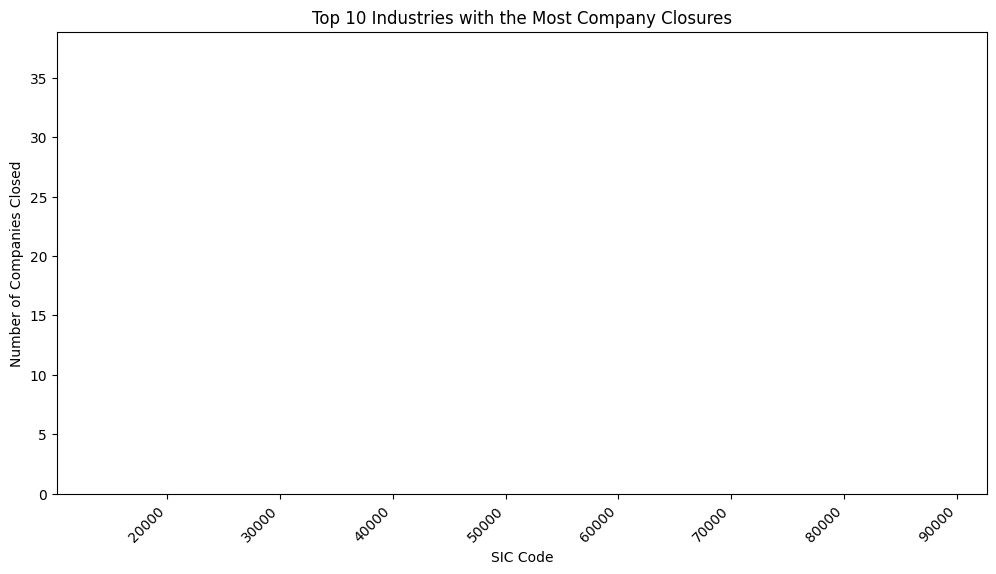

,SIC Code,Number of Companies Closed
0,13990.0,2
1,42130.0,1
2,43999.0,31
3,46380.0,2
4,47730.0,1
5,56103.0,37
6,59112.0,5
7,74909.0,33
8,77291.0,1
9,88910.0,1


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge closed companies data with SIC codes to get industries
df_closures_industry = df_closures.merge(df_sic_codes, on='company_number', how='left')

# Count the most common industries for closed companies
top_industries_closures = df_closures_industry['sic_code'].value_counts().compute().head(10)

# Convert to DataFrame
df_top_industries_closures = top_industries_closures.reset_index()
df_top_industries_closures.columns = ['SIC Code', 'Number of Companies Closed']

# --- Plot: Company Closures by SIC Code ---
plt.figure(figsize=(12, 6))
plt.bar(df_top_industries_closures['SIC Code'], df_top_industries_closures['Number of Companies Closed'], color='salmon')
plt.xlabel('SIC Code')
plt.ylabel('Number of Companies Closed')
plt.title('Top 10 Industries with the Most Company Closures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# --- Optional: Display the DataFrame ---
# If you want to see the actual data in the DataFrame:
display(df_top_industries_closures)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


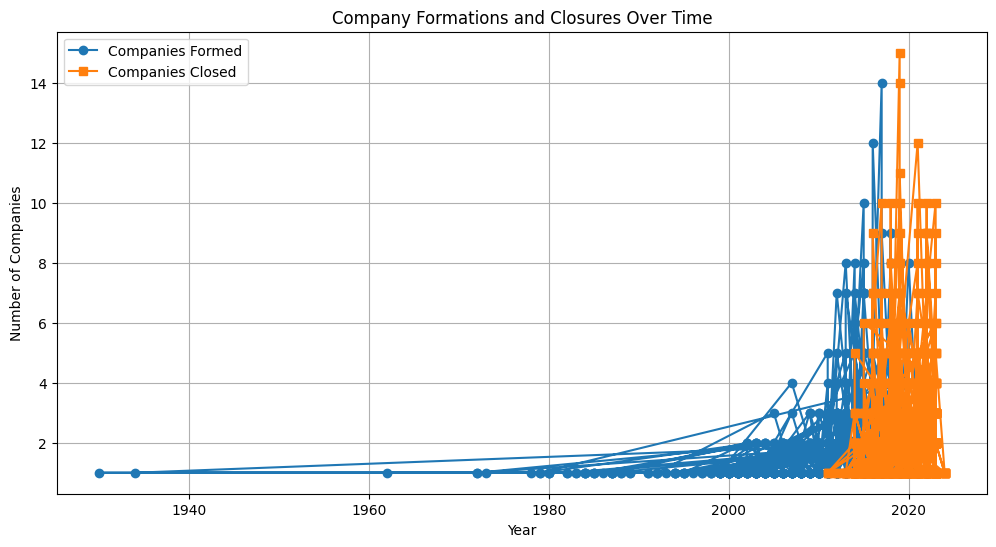

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot formations
# Use 'Number of Companies' instead of 'num_companies_formed'
plt.plot(df_formations_grouped['incorporation_year'].compute(),
         df_formations_grouped['Number of Companies'].compute(),
         label='Companies Formed', marker='o')

# Plot closures
# Assuming df_closures has a similar structure, replace 'num_companies_closed' with the actual column name
plt.plot(df_closures_grouped['closure_year'].compute(),
         df_closures_grouped['Number of Companies'].compute(),
         label='Companies Closed', marker='s')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Company Formations and Closures Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

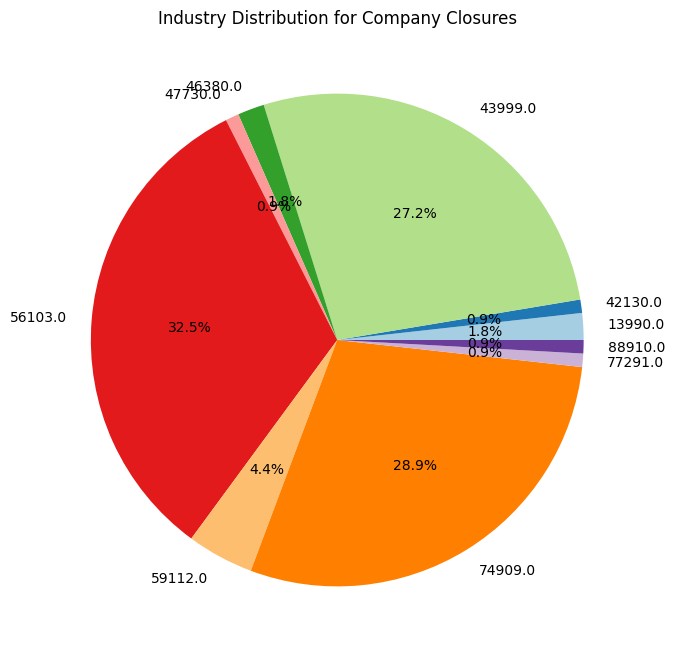

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df_top_industries_closures['Number of Companies Closed'], labels=df_top_industries_closures['SIC Code'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Industry Distribution for Company Closures')
plt.show()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


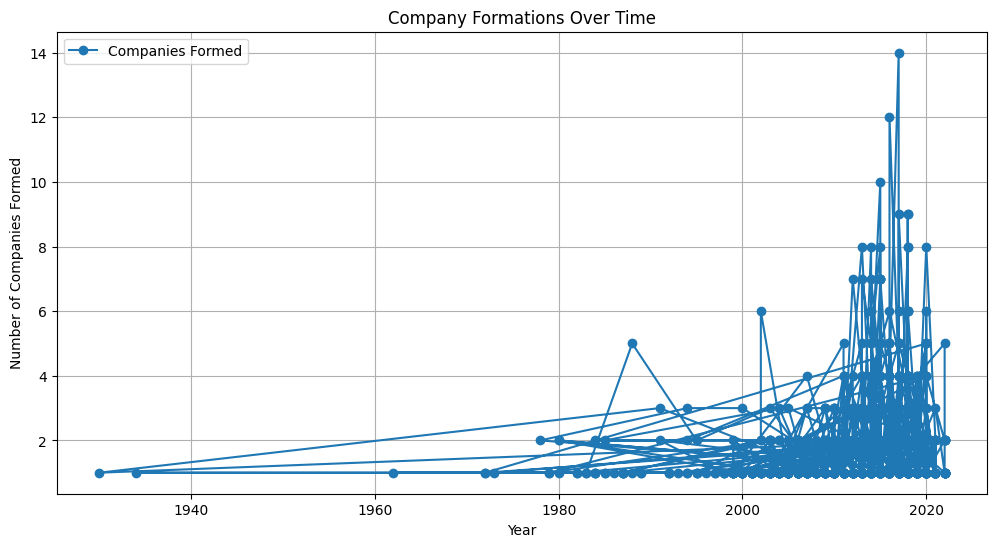

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


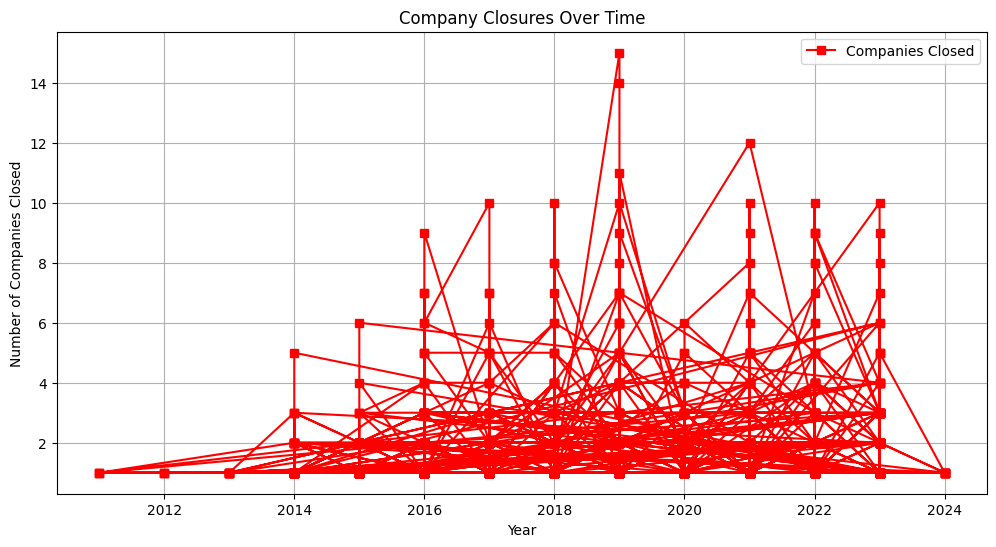

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


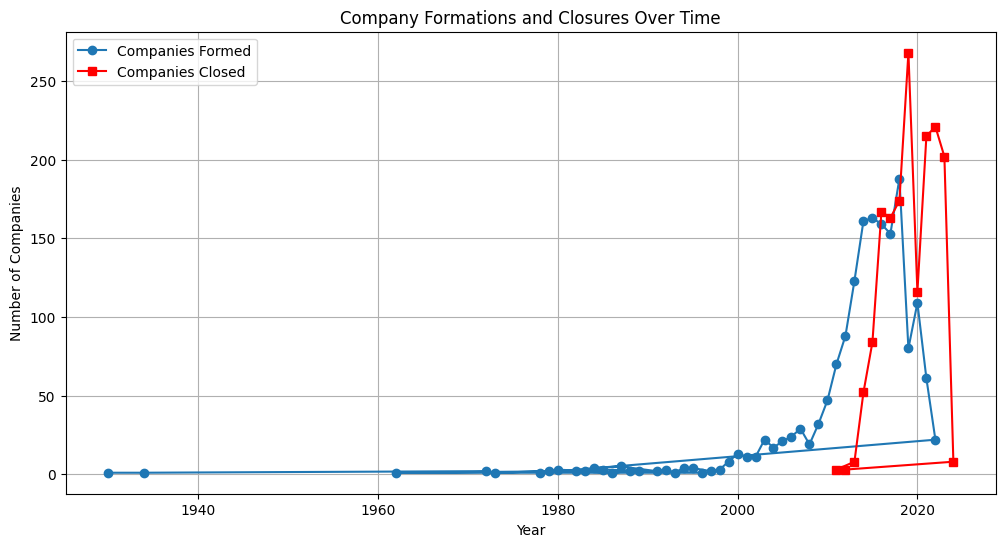

In [ ]:
import matplotlib.pyplot as plt

# --- Plot 1: Company Formations ---
plt.figure(figsize=(12, 6))
# Access the correct column for company formations, likely 'Number of Companies'
# Convert Dask Series to NumPy arrays before plotting
plt.plot(df_formations_grouped['incorporation_year'].compute(),
         df_formations_grouped['Number of Companies'].compute(),
         label='Companies Formed', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Companies Formed')
plt.title('Company Formations Over Time')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Company Closures ---
plt.figure(figsize=(12, 6))
# Access the correct column for company closures, likely 'Number of Companies'
# Convert Dask Series to NumPy arrays before plotting
plt.plot(df_closures_grouped['closure_year'].compute(),
         df_closures_grouped['Number of Companies'].compute(),
         label='Companies Closed', marker='s', color='red')  # Red color for closures
plt.xlabel('Year')
plt.ylabel('Number of Companies Closed')
plt.title('Company Closures Over Time')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 3: Combined Formations and Closures ---
plt.figure(figsize=(12, 6))

# Aggregate formations and closures by year to enable plotting on the same graph
formations_by_year = df_formations_grouped.groupby('incorporation_year')['Number of Companies'].sum().compute()
closures_by_year = df_closures_grouped.groupby('closure_year')['Number of Companies'].sum().compute()

# Convert Pandas Series to NumPy arrays for plotting
plt.plot(formations_by_year.index.to_numpy(), formations_by_year.values, label='Companies Formed', marker='o')
plt.plot(closures_by_year.index.to_numpy(), closures_by_year.values, label='Companies Closed', marker='s', color='red')  # Red color for closures

plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Company Formations and Closures Over Time')
plt.legend()
plt.grid(True)
plt.show()

sic code


In [ ]:
# Get top 5 most common SIC codes
top_sics = df_merged_pd['sic_code'].value_counts().nlargest(5).index
df_filtered = df_merged_pd[df_merged_pd['sic_code'].isin(top_sics)]


NameError: name 'df_merged_pd' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='incorporation_year', hue='sic_code')
plt.title('Company Formations Over Years by SIC Code')
plt.xlabel('Year')
plt.ylabel('Number of Companies Formed')
plt.xticks(rotation=45)
plt.legend(title='SIC Code')
plt.tight_layout()
plt.show()
